# Prueba Intertrimestral

**Nombre:**  
**Apellidos:**  

**Tiempo de la prueba:** 2 horas  
**Asignatura:** Desarrollo de Aplicaciones para la Visualización de Datos  
**Fecha:** 16 de octubre de 2025  

## Instrucciones

- Escribe **código limpio y autoexplicativo**.  
- Se pueden utilizar **los materiales de clase**.  
- Se puede utilizar **internet** para búsqueda de dudas y documentación.  
- **No se puede utilizar ningún tipo de LLM** (ChatGPT, Copilot, Gemini, etc.).  
- **No se puede utilizar mensajería instantánea**.  
- Al finalizar, **sube tu notebook a GitHub** y envía el enlace del fichero en el siguiente formulario:  
[https://forms.office.com/e/LFVwu9z6uQ](https://forms.office.com/e/LFVwu9z6uQ)


## Dataset “Life Style Data”

El dataset contiene información sobre hábitos de vida (alimentación, sueño, ejercicio, consumo de tabaco o alcohol, etc.) y medidas de salud (IMC, presión arterial, etc.) para diferentes individuos.

Puedes descargarlo del repositorio de la asignatura y un .txt con la descripción de las variables.


## Inicialización de librerías

In [12]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    confusion_matrix
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression

# Ejercicio 1 — Programación (2 puntos)

a) (0.6 pts) Crea una función imc(weight, height) que devuelva el índice de masa corporal (IMC), redondeado a dos decimales.



In [13]:
def imc(weight:float, height: float):
    bmi = weight / (height ** 2)
    return round(bmi, 2)

imc(54,1.73)

18.04

b) (0.6 pts) Crea una función saludable(imcValue) que devuelva "Saludable" si el IMC está entre 18.5 y 24.9, "Bajo peso" si es menor de 18.5, o "Sobrepeso" si es mayor de 24.9.

In [14]:
def saludable(imcValue:float):
    if imcValue < 18.5:
        return "Bajo Peso"
    elif imcValue < 24.9:
        return "Saludable"
    else:
        return "Sobrepeso"
    
saludable(imc(54,1.73))

'Bajo Peso'

c) (0.6 pts) Genera un DataFrame llamado imcData que contenga al menos 10 registros con las siguientes columnas:


*   peso (en kilogramos)

*   altura (en metros)

*   imc (calculado usando la función imc(weight, height) creada anteriormente)

Puedes generar los datos de peso y altura manualmente, mediante listas, o de forma aleatoria utilizando numpy (np.random.uniform o similar).

Añade una cuarta columna llamada categoria, cuyos valores provengan de la función saludable(imcValue).

Muestra las primeras filas del DataFrame resultante y comprueba que los tipos de datos son correctos.

In [15]:
# Random para que nos los produzca aleatoriamente
np.random.seed(42)

# Vamos a generar pesos entre 50 y 150 kgs para poder tener toda la variabilidad con respecto al peso
pesos = np.random.uniform(50, 150, 10).round(1)
alturas = np.random.uniform(1.5, 2.0, 10).round(2) 

imcs = [imc(peso, altura) for (peso, altura) in zip(pesos, alturas)]

categorias = [saludable(imc_value) for imc_value in imcs]

# Juntamos todo en un dataframe
datos_imc = pd.DataFrame({
    "PESO":pesos,
    "ALTURA":alturas, 
    "IMC": imcs,
    "CATEGORIAS":categorias
    }
)

datos_imc.head(10)


,PESO,ALTURA,IMC,CATEGORIAS
0,87.5,1.51,38.38,Sobrepeso
1,145.1,1.98,37.01,Sobrepeso
2,123.2,1.92,33.42,Sobrepeso
3,109.9,1.61,42.40,Sobrepeso
4,65.6,1.59,25.95,Sobrepeso
5,65.6,1.59,25.95,Sobrepeso
6,55.8,1.65,20.50,Saludable
7,136.6,1.76,44.10,Sobrepeso
8,110.1,1.72,37.22,Sobrepeso
9,120.8,1.65,44.37,Sobrepeso


d) (0.2 pts) ¿Cómo podrías integrar ambas funciones dentro de una clase llamada HealthTools que calcule el IMC y clasifique automáticamente a partir de listas de pesos y alturas?

In [16]:
class HealthTools():

    def __init__(self, pesos, alturas):
        self.pesos = pesos
        self.alturas = alturas

    def imc(self,weight:float, height: float):
        bmi = weight / (height ** 2)
        return round(bmi, 2)
    
    def saludable(self, imcValue:float):
        if imcValue < 18.5:
            return "Bajo Peso"
        elif imcValue < 24.9:
            return "Saludable"
        else:
            return "Sobrepeso"
    
    def analizar_lista(self):
        resultados = []
        for peso, altura in zip(self.pesos, self.alturas):
            imc = self.imc(peso, altura)
            categoria = self.saludable(imc)
            resultados.append((peso, altura, round(imc, 2), categoria))
        return resultados


pesos = [30,31,32,140,220,100]
alturas = [1.56,1.60,1.90,1.50,1.78]

salud = HealthTools(pesos, alturas)

salud.analizar_lista()



[(30, 1.56, 12.33, 'Bajo Peso'),
 (31, 1.6, 12.11, 'Bajo Peso'),
 (32, 1.9, 8.86, 'Bajo Peso'),
 (140, 1.5, 62.22, 'Sobrepeso'),
 (220, 1.78, 69.44, 'Sobrepeso')]

## Ejercicio 2 — Exploración y visualización (3 puntos)

a) (0.75 pts) Carga el dataset desde el fichero CSV y guárdalo en un DataFrame llamado lifeStyleData. Muestra las 5 primeras filas, el número de filas y columnas.

In [17]:
lifeStyleData = pd.read_csv("Final_data.csv")
print("Numero de filas es  y columnas es (filas, cols): " + str(lifeStyleData.shape))
lifeStyleData.head()

Numero de filas es  y columnas es (filas, cols): (20000, 54)


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


b) (0.75 pts) Crea una función describeData(dataFrame) que devuelva para cada columna: tipo de dato, número de valores nulos y porcentaje de nulos.

In [18]:
def describeData(dataFrame: pd.DataFrame):
    df_copy = dataFrame
    results = {}

    for column in df_copy:
        tipo = str(df_copy[column].dtype)
        numero_nas = df_copy[column].isna().sum()
        porcentaje_nas = round((numero_nas / len(df_copy)) * 100, 5)

        results[column] = {
            "Tipo": tipo,
            "NAs": numero_nas,
            "% NAs": round(porcentaje_nas, 2)
        }

    return results


c) (0.75 pts) Usa describeData(lifeStyleData) y comenta brevemente (2–3 líneas) qué variables parecen tener más valores faltantes.

In [19]:
datos_de_cols = pd.DataFrame(describeData(lifeStyleData))
datos_de_cols

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
Tipo,float64,object,float64,float64,float64,float64,float64,float64,float64,object,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,object
NAs,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
% NAs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
lifeStyleData.isna().sum().sum()

np.int64(3)

Como podemos observar en la tabla superior las filas que contienen valores nulos son Max_BPM y Avg_BPM (UNO CADA UNA). Esto implica que habria que quitar los NAs en pasos siguientes para poder hacer cualquier tipo de modelo. De todas formas, el porcentaje de NAs es despreciable

d) (0.75 pts) Realiza un gráfico que muestre las correlaciones entre variables numéricas. ¿Hay alguna correlación fuerte o inesperada?

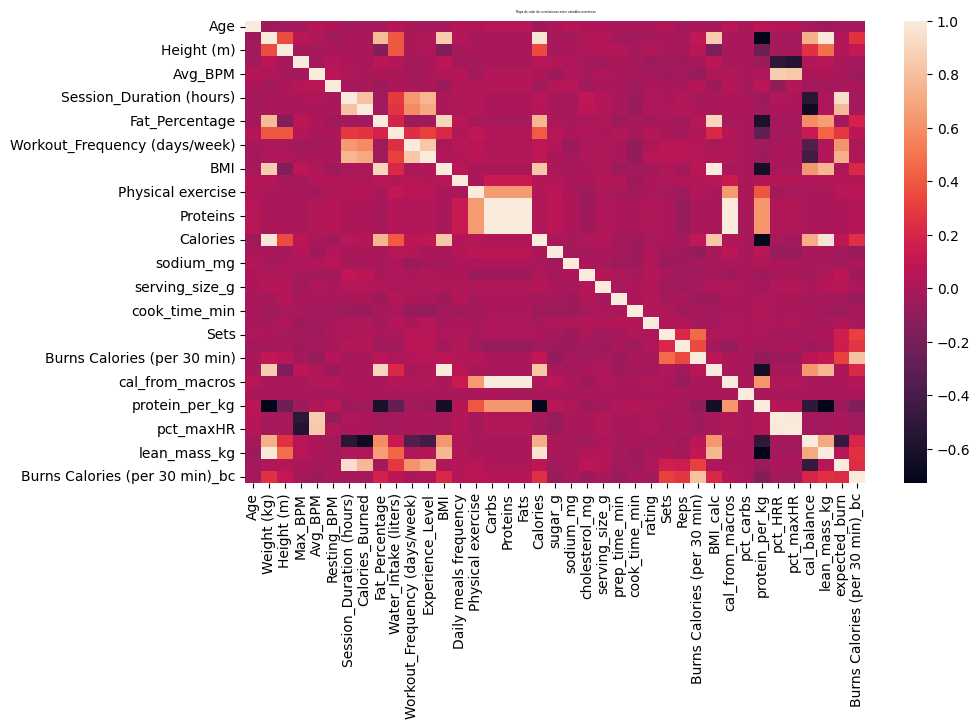

In [21]:
cols_numericas = datos_de_cols.loc["Tipo"][datos_de_cols.loc["Tipo"].isin(["float64", "int64"])].index
lifeStyleData = lifeStyleData.dropna()

lifeStyleData_numerico = lifeStyleData[cols_numericas]

lifeStyleData_numerico.head()
corr_matrix = lifeStyleData_numerico.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(
    corr_matrix,
)

plt.title("Mapa de calor de correlaciones entre variables numéricas", fontsize=2)
plt.show()

## Ejercicio 3 — Regresión básica (2 puntos)

Queremos predecir una variable de salud continua, por ejemplo bmi.

a) (0.25 pts) Define targetVar = "bmi" y selecciona 2–3 variables predictoras (por ejemplo sleepHours, activityLevel, calories). Guarda las columnas predictoras en X y la variable objetivo en y.

In [22]:
targetVar = "BMI"
predictoras = ["Weight (kg)", "Calories", "protein_per_kg"]

X = lifeStyleData.loc[:, predictoras]
y = lifeStyleData[targetVar]



b) (0.25 pts) Divide los datos en entrenamiento (70 %) y prueba (30 %).

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

c) (0.75 pts) Entrena un modelo de regresión lineal (LinearRegression) y calcula el R² y el MSE.

In [38]:
lm = Pipeline(steps=[
  ('scaler', StandardScaler()),
  ("lm", LinearRegression()),
])

lm = lm.fit(X_train, y_train)
lm

,steps,"[('scaler', ...), ('lm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [39]:
# Calculate and print R^2 score.
print("Variance explanation R^2 = {}".format(round(lm.score(X, y),2)))

# Calculate and print MSE.
y_pred_test  = lm.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
print(f"Mean squared error: {mse:.4f}")


# Calculate and print RMSE.
rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

Variance explanation R^2 = 0.73
Mean squared error: 12.0416
Root mean squared error: 3.4701


d) (0.75 pts) Entrena un RandomForestRegressor con los mismos datos y compara resultados. ¿Cuál tiene mejor rendimiento?

In [ ]:
rf = RandomForestRegressor().fit(X_train, y_train)

rf = Pipeline(steps=[
  ('scaler', StandardScaler()),
  ("rf", RandomForestRegressor()),
])

rf = rf.fit(X_train, y_train)

print("Variance explanation R^2 = {}".format(round(rf.score(X, y),2)))

Variance explanation R^2 = 0.96


En la comparativa podemos ver como el RandomForest es mucho mas preciso a la hora de determinar el BMI que el modelo de Regresion lineal. El primero tiene un R^2 de un 96%, mientras que el segundo del 73%.

## Ejercicio 4 — Clasificación sencilla (2 puntos)

Crea una nueva variable binaria que indique si el IMC está dentro del rango saludable.

a) (0.25 pts) Crea una nueva columna bmiHealthy donde el valor sea 1 si bmi está entre 18.5 y 24.9, y 0 en caso contrario.

In [ ]:
lifeStyleData["bmiHealthy"] = 0
lifeStyleData.loc[(lifeStyleData["BMI"] > 18.5) & (lifeStyleData["BMI"] < 24.9), "bmiHealthy" ] = 1
lifeStyleData[["BMI", "bmiHealthy"]].head(10)

,BMI,bmiHealthy
0,24.87,1
1,23.48,1
2,21.15,1
3,32.45,0
4,14.83,0
5,31.03,0
6,18.44,0
7,31.64,0
8,27.65,0
9,19.66,1


b) (0.75 pts) Entrena un modelo de regresión logística (LogisticRegression) para predecir bmiHealthy usando algunas variables de estilo de vida (por ejemplo sleepHours, activityLevel, calories).

In [ ]:
lifeStyleDataLogReg_df = lifeStyleData.copy()

lifeStyleDataLogReg_df['bmiHealthy'] = lifeStyleDataLogReg_df['bmiHealthy'].astype('category')

X = lifeStyleDataLogReg_df[["Weight (kg)", "Calories", "protein_per_kg", "lean_mass_kg", "Fat_Percentage"]]

y = lifeStyleDataLogReg_df['bmiHealthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

clf_log = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ("glm", LogisticRegression(max_iter=10000, tol=0.1)),
])


# clf_log = LogisticRegression(max_iter=10000, tol=0.1)
clf_log.fit(X_train, y_train)

predictions = clf_log.predict(X_test)

c) (0.25 pts) Calcula la exactitud (accuracy) del modelo y muestra la matriz de confusión.


In [ ]:

print("Classification report")
print(classification_report(y_test, predictions))

print("Confusion matrix")
print(confusion_matrix(y_test, predictions))

Classification report
              precision    recall  f1-score   support

           0       0.76      0.68      0.72      2489
           1       0.55      0.65      0.60      1511

    accuracy                           0.67      4000
   macro avg       0.66      0.66      0.66      4000
weighted avg       0.68      0.67      0.67      4000

Confusion matrix
[[1690  799]
 [ 529  982]]


Podemos ver que la precision media obtenida es del 67%

d) (0.75 pts) Explica qué variable parece influir más según el modelo.

C:\Users\alonso lidon gonzalo\AppData\Local\Temp\ipykernel_11008\525325707.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 0, 'Valor del coeficiente')

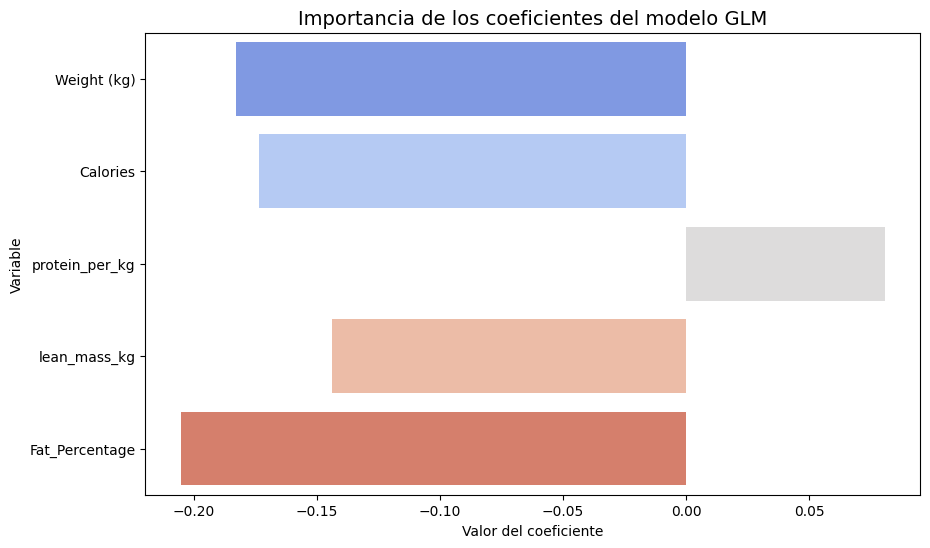

In [ ]:
lmc = clf_log.named_steps['glm'].coef_
coefficients = lmc[0]

coef_df = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": coefficients
})

plt.figure(figsize=(10, 6))
sns.barplot(
    data=coef_df,
    x="Coeficiente",
    y="Variable",
    palette="coolwarm" 
)

plt.title("Importancia de los coeficientes del modelo GLM", fontsize=14)
plt.xlabel("Valor del coeficiente")

En el modelo GLM, la variable que muestra mayor influencia es Fat_Percentage, ya que tiene el coeficiente con mayor magnitud. Esto sugiere una relación inversa: al aumentar el porcentaje de grasa corporal, el valor predicho por el modelo tiende a disminuir. Otras variables como Weight (kg) y Calories también presentan un efecto negativo, aunque algo menor, mientras que protein_per_kg muestra un efecto positivo más débil.

## Ejercicio 5 — Conclusión (1 punto)

En un máximo de 300 palabras, resume:

*   Qué hábitos parecen tener mayor relación con el estado de salud.

*   Qué modelo fue más eficaz y por qué.

*   Qué podrías mejorar si tuvieras más tiempo o datos.

